In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [6]:
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [5]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [4]:
df["date_x"]=pd.to_datetime(df["date_x"]) #Convert date coloumn datatype to dattime since, it's of object type.

In [5]:
df["genre"]=df["genre"].fillna("unavailble") #Filled null value of genre with unavailable 

In [6]:
df["crew"]=df["crew"].fillna("unavailble") #Filled out null value of crew coloumn with unavailable

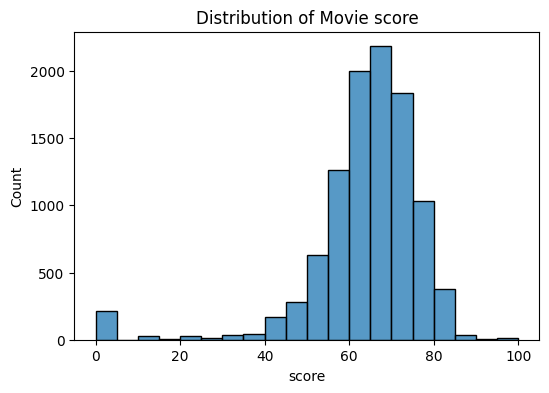

In [46]:
#What is the distribution of movie Score? Plot a histogram and describe its shape
plt.figure(figsize=(6,4))
plt.title("Distribution of Movie score")
sns.histplot(x="score", data=df, bins=20)
plt.show()

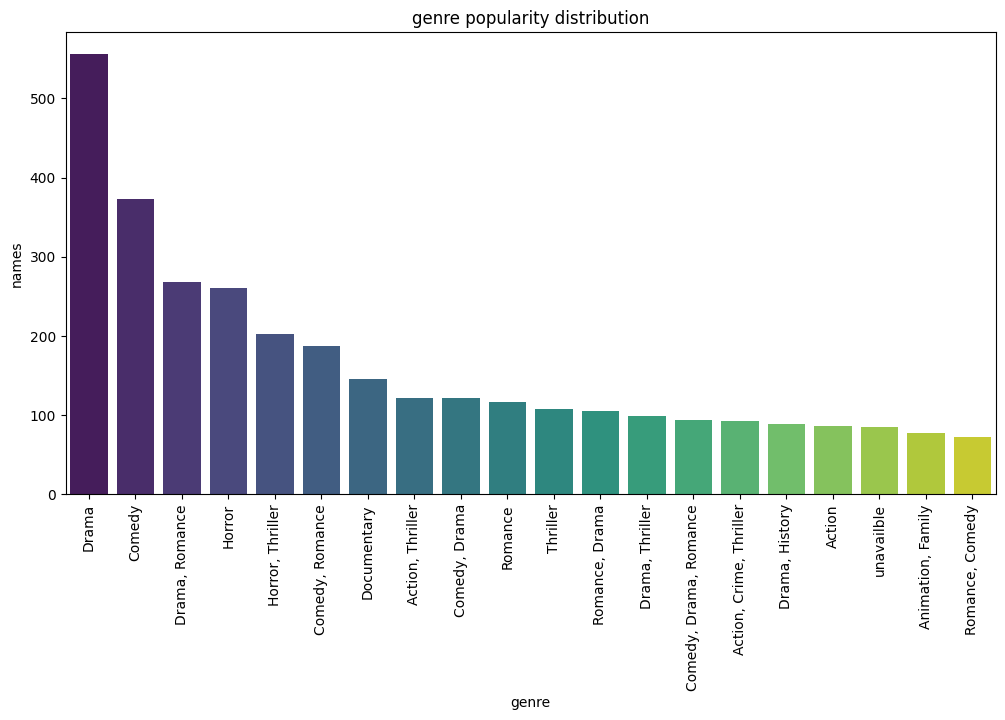

In [44]:
#What are the most common genres in the dataset? Use a bar chart to show their distribution
gb=df.groupby("genre").agg({"names":"count"})
gb=gb.sort_values(by ="names", ascending=False)
gb=gb.head(20)
gb
plt.figure(figsize=(12,6))
plt.title("genre popularity distribution")
plt.xticks(rotation=90)
sns.barplot(x=gb.index,y=gb["names"], data=gb, hue=gb.index, palette="viridis")
plt.show()


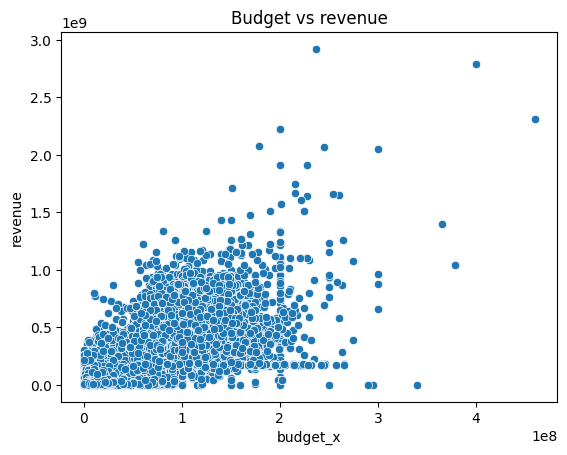

In [54]:
#relationship between a Budget and its revenue
plt.title("Budget vs revenue")
sns.scatterplot(x=df["budget_x"],y=df["revenue"])
plt.show()

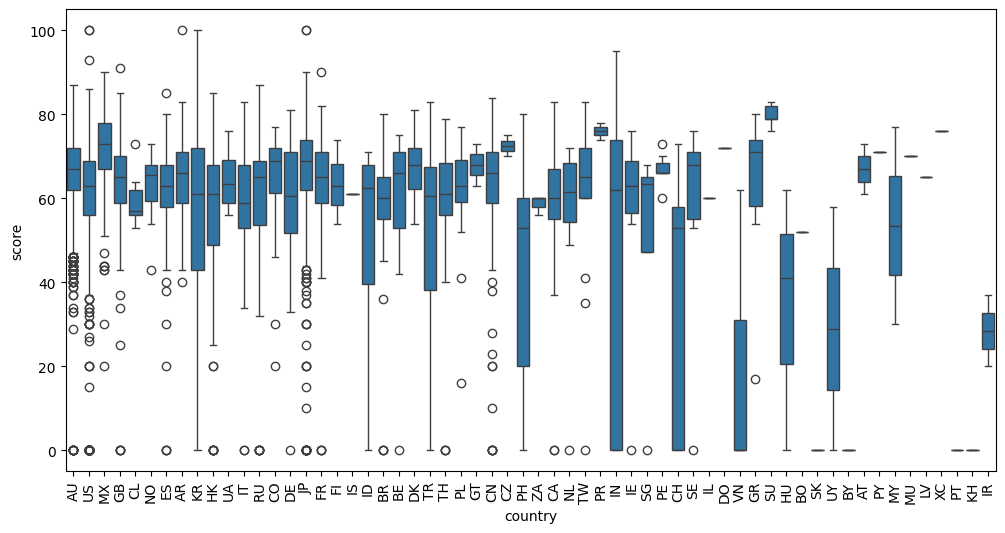

In [60]:
#score vary by country(using box plot)
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxplot(x="country",y="score", data=df)
plt.show()

In [8]:
df1=df[["score","budget_x","revenue"]]   #Co_relation b/w score, budget and revenue
c=df1.corr()

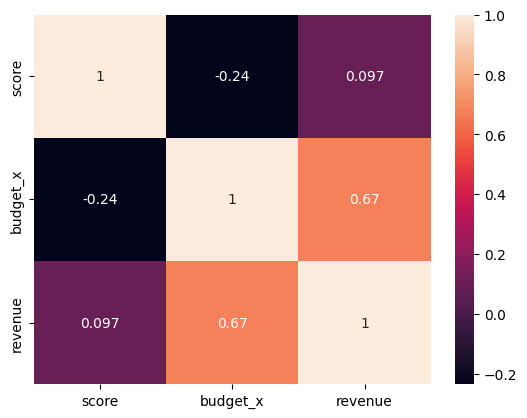

In [10]:
sns.heatmap(c, annot=True)
plt.show()

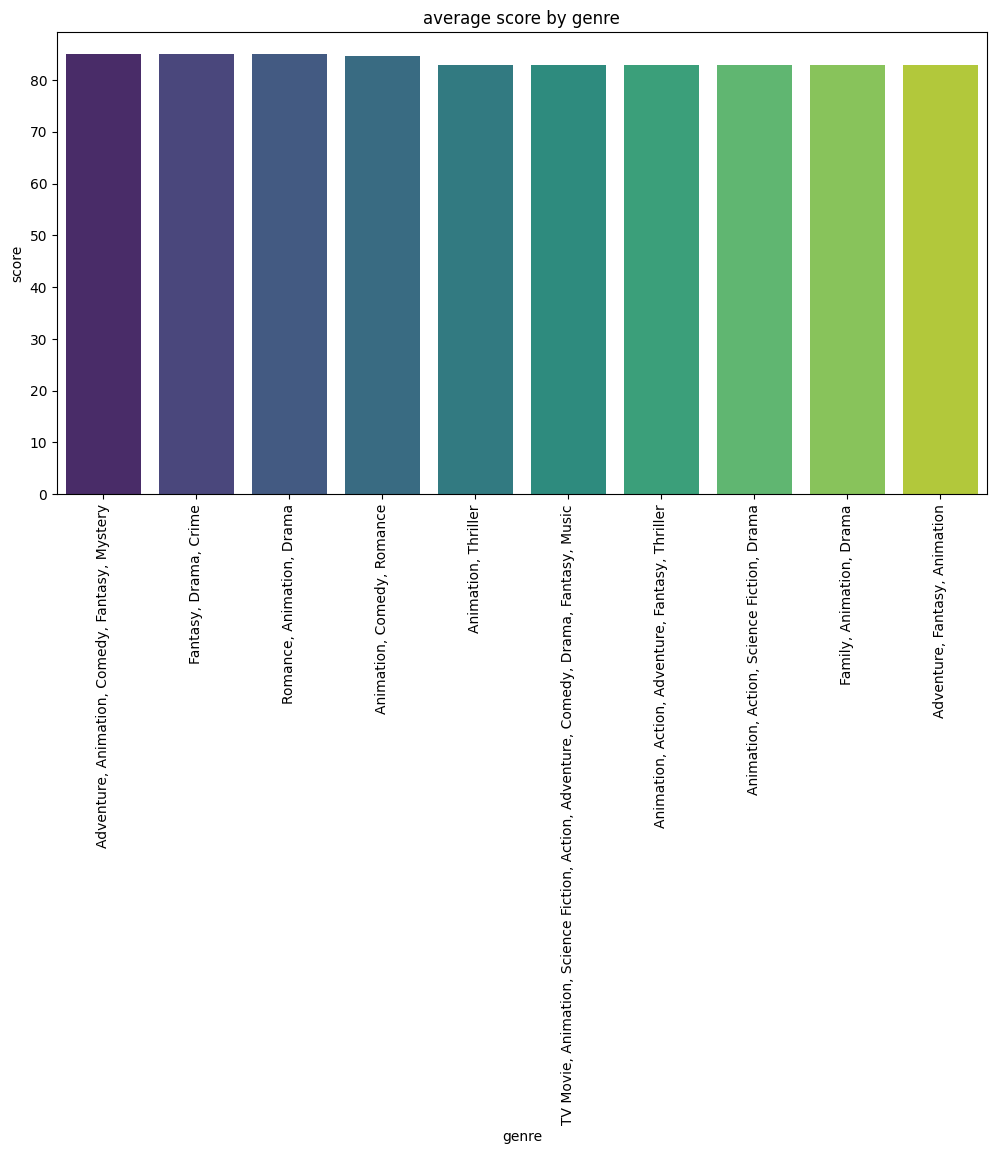

In [12]:
#Which genre has the highest average score? Calculate the average score for each genre and plot the results.
gb=df.groupby("genre").agg({"score":"mean"})
gb=gb.sort_values(by ="score", ascending=False)
gb=gb.head(10)
gb
plt.figure(figsize=(12,6))
plt.title("average score by genre")
plt.xticks(rotation=90)
sns.barplot(x=gb.index,y=gb["score"], data=gb, hue=gb.index, palette="viridis")

plt.show()

In [7]:
df["year"] = df["date_x"].dt.year #Converted Year coloumn from object type to int
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,2016
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,1990
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1990
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1995


In [39]:
#movie release per year by genre
gb=df.groupby(["year","genre"]).agg({"date_x":"count"})
gb

date_x
year genre                                 
1903 Drama, History                       1
1907 Adventure, Science Fiction           1
1915 Drama, History, War                  2
1920 Drama, Horror, Thriller, Crime       1
1923 Comedy, Romance, Thriller            1
...                                     ...
2023 War, Drama, History                  1
     War, History, Drama                  1
     Western                              1
     Western, Action                      1
     unavailble                          24

[6438 rows x 1 columns]

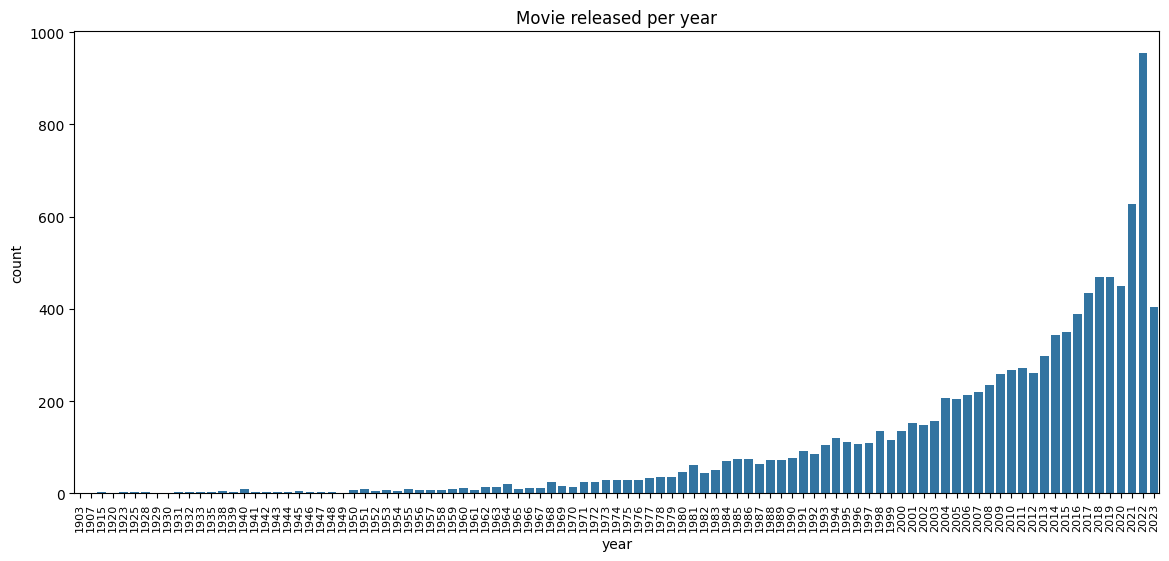

In [25]:
plt.figure(figsize=(14,6)) #ploted the movie release per year using countplot
plt.xticks(rotation=90,fontsize=8)
plt.title("Movie released per year")
sns.countplot(x="year", data=df)
plt.show()

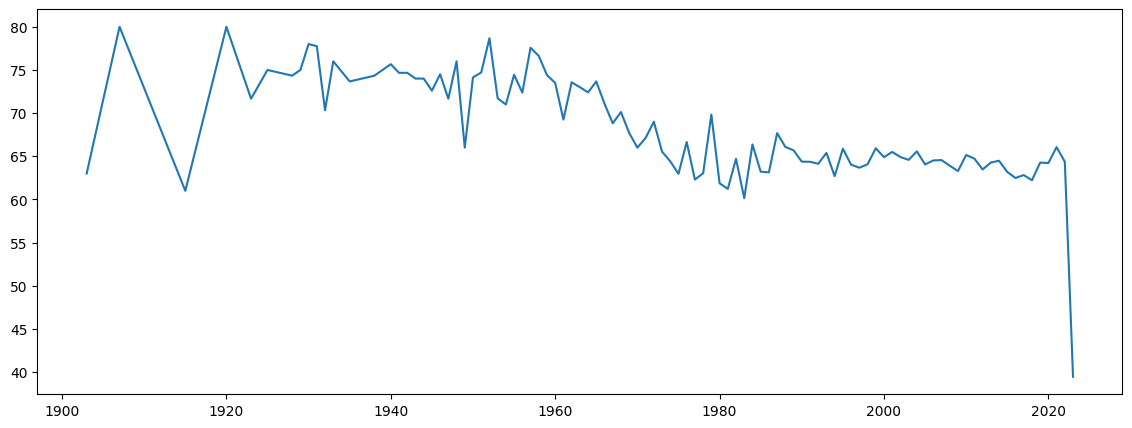

In [21]:
#Average movie score changed over the years
plt.figure(figsize=(14,5))
gb=df.groupby("year").agg({"score":"mean"})
plt.plot(gb.index,"score",data=gb)
plt.show()

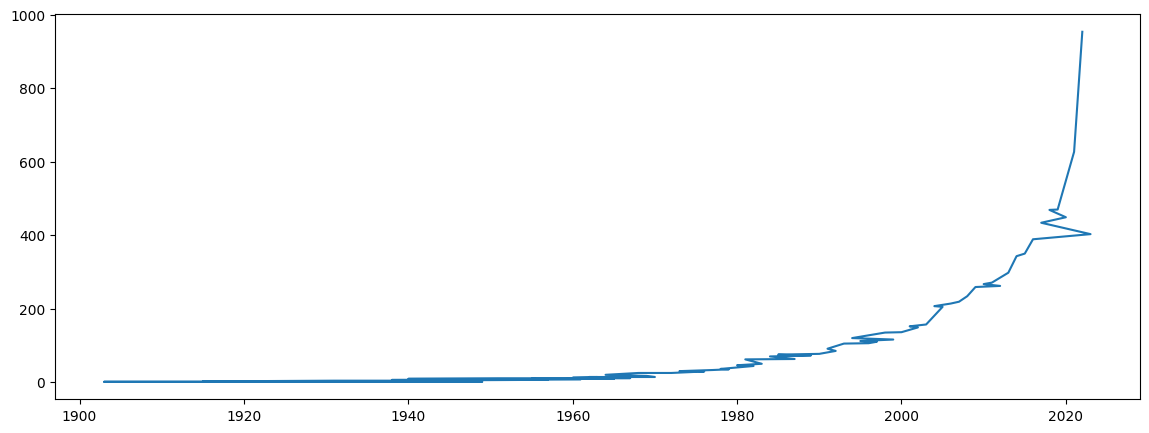

In [33]:
#Plot the number of movies released each year
gb=df.groupby("year").agg({"names":"count"})
gb=gb.sort_values(by="names", ascending=False)
gb
plt.figure(figsize=(14,5))
plt.plot(gb.index,"names", data=gb)
plt.show()

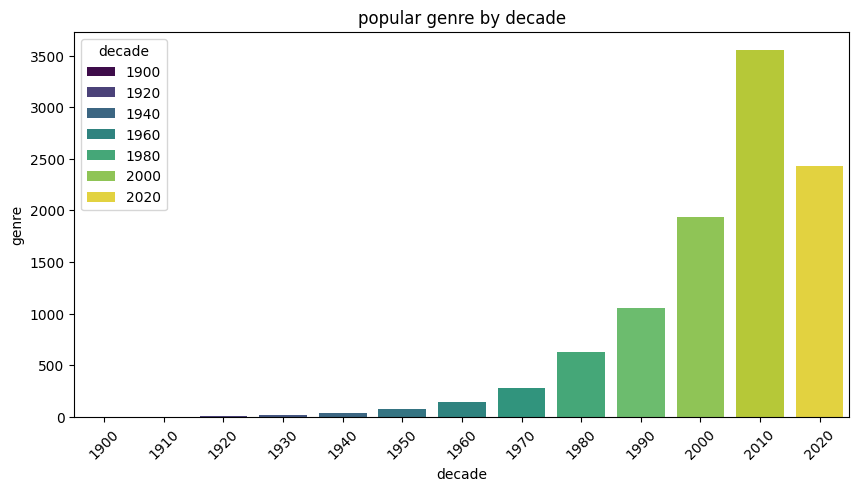

In [23]:
#Which genres are most popular in each decade
df['decade']=(df['year']//10)*10
gb=df.groupby("decade").agg({"genre":"count"})
gb
plt.figure(figsize=(10,5))
plt.title("popular genre by decade")
plt.xticks(rotation=45)
sns.barplot(x=gb.index,y=gb["genre"], data=gb, hue=gb.index, palette="viridis")

plt.show()

#Key Insights 
#Distribution of Movie Scores: Most movies have scores between 60 and 80, showing that most movies are rated in the average to good range. 
#Genre Popularity Distribution: Drama is the most popular genre, followed by Comedy and Drama-Romance combinations, while Animation and Family genres are less common.

#Budget vs. Revenue
There is a positive correlation between movie budgets and revenues, indicating that higher budgets tend to result in higher revenues. However, there are outliers where low-budget movies also generated significant revenue.

#Score Variation by Country
Movie scores vary significantly across countries. Some countries have a narrow range of scores with higher medians, while others display broader distributions and lower median scores.

#Correlation b/w budget, revenue and scores
Budget and revenue are strongly positively correlated (correlation: 0.67).
Movie scores show a weak negative correlation with budget (-0.24) and a negligible positive correlation with revenue (0.097).

#Movies Released Per Year: The number of movies released has grown steadily over time, with a significant rise in recent decades. The peak was observed in 2022, with nearly 1000 movies released in that year alone.

#Average Movie Score Over the Years: Average scores dropped from 80 in the early 1900s to around 60 in recent years.

#Popular Genre by Decade: Genre popularity peaked in the 2010s with over 3500 releases.
